# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(7654, 7654)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2021-04-22 06:51:31,liquid,bitbank,BTC/JPY,0.0007,1
1,2021-04-22 07:05:25,bitbank,liquid,BTC/JPY,0.0007,0
2,2021-04-22 07:05:26,liquid,bitbank,BTC/JPY,0.0007,1
3,2021-04-22 07:05:44,bitbank,liquid,BTC/JPY,0.0007,0
4,2021-04-22 07:07:25,bitbank,liquid,BTC/JPY,0.0007,2
...,...,...,...,...,...,...
289,2021-04-22 09:15:01,bitbank,liquid,BTC/JPY,0.0007,-1
290,2021-04-22 09:15:15,liquid,bitbank,BTC/JPY,0.0007,2
291,2021-04-22 09:15:37,bitbank,liquid,BTC/JPY,0.0007,-1
292,2021-04-22 09:15:44,liquid,bitbank,BTC/JPY,0.0007,2


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2021-04-22 06:51:31,liquid,買い,5937263.0
1,2021-04-22 06:51:31,bitbank,売り,5939990.0
2,2021-04-22 07:05:25,bitbank,買い,5934795.0
3,2021-04-22 07:05:25,liquid,売り,5933390.0
4,2021-04-22 07:05:26,liquid,買い,5932598.0
...,...,...,...,...
583,2021-04-22 09:15:37,liquid,売り,5777513.0
584,2021-04-22 09:15:44,liquid,買い,5776685.0
585,2021-04-22 09:15:44,bitbank,売り,5780000.0
586,2021-04-22 09:16:03,bitbank,買い,5778001.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                 7654
           取引回数                  294
           開始日時  2021-04-22 06:50:58
           終了日時  2021-04-22 09:16:21
        取引時間[H]      0 days 02:25:23
      取引単位[BTC]               0.0007
  利確しきい値[JPY]                 3000
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      10195
利益[JPY]        195
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]   139026
終了[TOTAL]   139222
利益[TOTAL]  195.865
-----------  -------


## グラフ出力

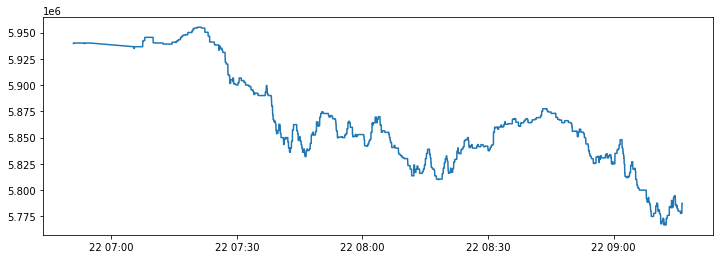

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

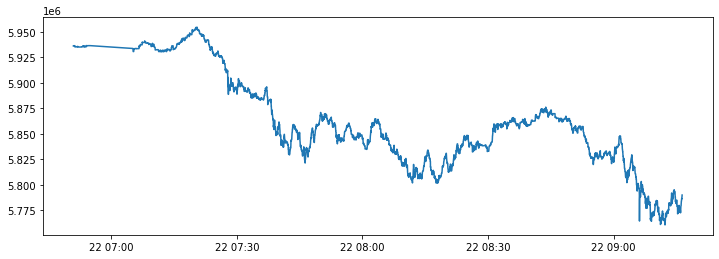

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_ex1_sell_ex2": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_ex2_sell_ex1": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'ex1_bid': df_ex1.reset_index().bid,
     'ex2_ask': df_ex2.reset_index().ask,
    'ex2_bid': df_ex2.reset_index().bid,
    'ex1_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_ex1_sell_ex2,buy_ex2_sell_ex1,ex1_bid,ex2_ask,ex2_bid,ex1_ask
timestamp,,,,,,
2021-04-22 06:50:00,-4116,2231,5939956,5937725,5935758,5939874
2021-04-22 07:00:00,-3118,3201,5940520,5937320,5936526,5939644
2021-04-22 07:10:00,-5545,4829,5943286,5938457,5937846,5943390
2021-04-22 07:20:00,-8960,7152,5934528,5927375,5926359,5935318
2021-04-22 07:30:00,-7575,5699,5890452,5884753,5884180,5891754
2021-04-22 07:40:00,-7442,4339,5849589,5845251,5844802,5852244
2021-04-22 07:50:00,-6740,5593,5860291,5854698,5854366,5861105
2021-04-22 08:00:00,-8219,6782,5849650,5842868,5842295,5850515
2021-04-22 08:10:00,-8250,6121,5821189,5815068,5814581,5822831
